In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("DataSets/Darknet.csv", on_bad_lines='skip')

In [3]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [5]:
data.isna().sum()

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Label       0
Label.1     0
Length: 85, dtype: int64

In [6]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [7]:
important_columns = [
    'Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
    'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
    'Packet Length Mean', 'Packet Length Std', 'Fwd IAT Mean', 'Bwd IAT Mean',
    'Active Mean', 'Idle Mean', 'SYN Flag Count', 'ACK Flag Count', 'RST Flag Count',
    'FIN Flag Count', 'Subflow Fwd Packets', 'Subflow Bwd Packets', 'Label','Label.1'
]

In [8]:
df3 = data[important_columns]

In [9]:
df3.isna().sum()

Protocol                   0
Flow Duration              0
Total Fwd Packet           0
Total Bwd packets          0
Flow Bytes/s              47
Flow Packets/s             0
Fwd Packet Length Mean     0
Bwd Packet Length Mean     0
Packet Length Mean         0
Packet Length Std          0
Fwd IAT Mean               0
Bwd IAT Mean               0
Active Mean                0
Idle Mean                  0
SYN Flag Count             0
ACK Flag Count             0
RST Flag Count             0
FIN Flag Count             0
Subflow Fwd Packets        0
Subflow Bwd Packets        0
Label                      0
Label.1                    0
dtype: int64

In [10]:
(df3 == '0.0000').sum()
(df3 == ' ').sum()

Protocol                  0
Flow Duration             0
Total Fwd Packet          0
Total Bwd packets         0
Flow Bytes/s              0
Flow Packets/s            0
Fwd Packet Length Mean    0
Bwd Packet Length Mean    0
Packet Length Mean        0
Packet Length Std         0
Fwd IAT Mean              0
Bwd IAT Mean              0
Active Mean               0
Idle Mean                 0
SYN Flag Count            0
ACK Flag Count            0
RST Flag Count            0
FIN Flag Count            0
Subflow Fwd Packets       0
Subflow Bwd Packets       0
Label                     0
Label.1                   0
dtype: int64

In [11]:
# Show rows with NaN or 0.0000
missing_rows = df3[(df3.isna().any(axis=1)) | (df3 == 0.0000).any(axis=1)]
missing_rows.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Bytes/s,Flow Packets/s,Fwd Packet Length Mean,Bwd Packet Length Mean,Packet Length Mean,Packet Length Std,Fwd IAT Mean,Bwd IAT Mean,Active Mean,Idle Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,FIN Flag Count,Subflow Fwd Packets,Subflow Bwd Packets,Label,Label.1
0,6,229,1,1,0.00000,8733.624454,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0,0.000000e+00,0,2,0,2,0,0,Non-Tor,AUDIO-STREAMING
1,6,407,1,1,0.00000,4914.004914,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0,0.000000e+00,0,2,0,2,0,0,Non-Tor,AUDIO-STREAMING
2,6,431,1,1,0.00000,4640.371230,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0,0.000000e+00,0,2,0,2,0,0,Non-Tor,AUDIO-STREAMING
3,6,359,1,1,0.00000,5571.030641,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0,0.000000e+00,0,2,0,2,0,0,Non-Tor,AUDIO-STREAMING
4,6,10778451,591,400,6604.75239,91.942711,109.187817,16.6475,71.876008,56.93647,18268.561017,26936.932331,0,1.437765e+15,0,991,0,1,0,0,Non-Tor,AUDIO-STREAMING


In [12]:
# Find columns with NaN OR 0.0000 values
nan_or_zero = df3.isna().sum() + (df3 == 0.0000).sum()
print(nan_or_zero[nan_or_zero > 0])

Protocol                     799
Flow Duration                 49
Total Bwd packets          40583
Flow Bytes/s               38090
Fwd Packet Length Mean     39805
Bwd Packet Length Mean     75089
Packet Length Mean         38090
Packet Length Std          59602
Fwd IAT Mean               40860
Bwd IAT Mean               85115
Active Mean               141530
Idle Mean                  68218
SYN Flag Count            108858
ACK Flag Count             58339
RST Flag Count            138243
FIN Flag Count             81370
Subflow Fwd Packets       100947
Subflow Bwd Packets       141530
dtype: int64


In [13]:
(df3 == 0.0000).sum()

Protocol                     799
Flow Duration                 49
Total Fwd Packet               0
Total Bwd packets          40583
Flow Bytes/s               38043
Flow Packets/s                 0
Fwd Packet Length Mean     39805
Bwd Packet Length Mean     75089
Packet Length Mean         38090
Packet Length Std          59602
Fwd IAT Mean               40860
Bwd IAT Mean               85115
Active Mean               141530
Idle Mean                  68218
SYN Flag Count            108858
ACK Flag Count             58339
RST Flag Count            138243
FIN Flag Count             81370
Subflow Fwd Packets       100947
Subflow Bwd Packets       141530
Label                          0
Label.1                        0
dtype: int64

In [14]:
# 0.0000 values replace with NaN
df3.replace(0.0000, np.nan, inplace=True)

# Fill in missing values for all but `label` and `label.1`
cols_to_fill = df3.columns.difference(['Label', 'Label.1'])
df3[cols_to_fill] = df3[cols_to_fill].fillna(df3[cols_to_fill].median())

C:\Users\Arsalan Khatri\AppData\Local\Temp\ipykernel_4660\4185550116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace(0.0000, np.nan, inplace=True)
C:\Users\Arsalan Khatri\AppData\Local\Temp\ipykernel_4660\4185550116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[cols_to_fill] = df3[cols_to_fill].fillna(df3[cols_to_fill].median())


In [15]:
df3.dtypes

Protocol                  float64
Flow Duration             float64
Total Fwd Packet            int64
Total Bwd packets         float64
Flow Bytes/s              float64
Flow Packets/s            float64
Fwd Packet Length Mean    float64
Bwd Packet Length Mean    float64
Packet Length Mean        float64
Packet Length Std         float64
Fwd IAT Mean              float64
Bwd IAT Mean              float64
Active Mean               float64
Idle Mean                 float64
SYN Flag Count            float64
ACK Flag Count            float64
RST Flag Count            float64
FIN Flag Count            float64
Subflow Fwd Packets       float64
Subflow Bwd Packets       float64
Label                      object
Label.1                    object
dtype: object

In [16]:
df3.isnull().sum()

Protocol                       0
Flow Duration                  0
Total Fwd Packet               0
Total Bwd packets              0
Flow Bytes/s                   0
Flow Packets/s                 0
Fwd Packet Length Mean         0
Bwd Packet Length Mean         0
Packet Length Mean             0
Packet Length Std              0
Fwd IAT Mean                   0
Bwd IAT Mean                   0
Active Mean               141530
Idle Mean                      0
SYN Flag Count                 0
ACK Flag Count                 0
RST Flag Count                 0
FIN Flag Count                 0
Subflow Fwd Packets            0
Subflow Bwd Packets       141530
Label                          0
Label.1                        0
dtype: int64

In [17]:
df3.tail()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Bytes/s,Flow Packets/s,Fwd Packet Length Mean,Bwd Packet Length Mean,Packet Length Mean,Packet Length Std,Fwd IAT Mean,Bwd IAT Mean,Active Mean,Idle Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,FIN Flag Count,Subflow Fwd Packets,Subflow Bwd Packets,Label,Label.1
141525,17.0,411806.0,2,2.0,106.846428,4.856656,22.0,130.777778,22.0,101.613647,411806.000000,613071.00000,NaN,1.456254e+15,2.0,4.0,1.0,1.0,1.0,NaN,VPN,VOIP
141526,17.0,411574.0,2,2.0,106.906656,4.859393,22.0,130.777778,22.0,101.613647,411574.000000,613071.00000,NaN,1.456254e+15,2.0,4.0,1.0,1.0,1.0,NaN,VPN,VOIP
141527,17.0,422299.0,2,2.0,104.191580,4.735981,22.0,130.777778,22.0,101.613647,422299.000000,613071.00000,NaN,1.456254e+15,2.0,4.0,1.0,1.0,1.0,NaN,VPN,VOIP
141528,17.0,411855.0,2,2.0,106.833716,4.856078,22.0,130.777778,22.0,101.613647,411855.000000,613071.00000,NaN,1.456254e+15,2.0,4.0,1.0,1.0,1.0,NaN,VPN,VOIP
141529,17.0,119990044.0,5995,6000.0,8297.230060,99.966627,83.0,83.000000,83.0,101.613647,20016.132299,20001.47858,NaN,1.432316e+15,2.0,4.0,1.0,1.0,1.0,NaN,VPN,VOIP


In [18]:
df3.drop(columns=['Active Mean', 'Subflow Bwd Packets'], inplace=True, errors='ignore')

C:\Users\Arsalan Khatri\AppData\Local\Temp\ipykernel_4660\3477554642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns=['Active Mean', 'Subflow Bwd Packets'], inplace=True, errors='ignore')


In [19]:
unique_counts = df3.nunique()
print(unique_counts)

Protocol                      2
Flow Duration             81825
Total Fwd Packet           2121
Total Bwd packets          2139
Flow Bytes/s              73860
Flow Packets/s            82721
Fwd Packet Length Mean    16067
Bwd Packet Length Mean    15271
Packet Length Mean        20387
Packet Length Std         24133
Fwd IAT Mean              61531
Bwd IAT Mean              39216
Idle Mean                 56664
SYN Flag Count                5
ACK Flag Count             2488
RST Flag Count               12
FIN Flag Count                2
Subflow Fwd Packets           1
Label                         4
Label.1                      11
dtype: int64


In [20]:
df3.drop(columns=['Subflow Fwd Packets'], inplace=True, errors='ignore')

C:\Users\Arsalan Khatri\AppData\Local\Temp\ipykernel_4660\1285737722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns=['Subflow Fwd Packets'], inplace=True, errors='ignore')


In [21]:
df3.isna().sum()

Protocol                  0
Flow Duration             0
Total Fwd Packet          0
Total Bwd packets         0
Flow Bytes/s              0
Flow Packets/s            0
Fwd Packet Length Mean    0
Bwd Packet Length Mean    0
Packet Length Mean        0
Packet Length Std         0
Fwd IAT Mean              0
Bwd IAT Mean              0
Idle Mean                 0
SYN Flag Count            0
ACK Flag Count            0
RST Flag Count            0
FIN Flag Count            0
Label                     0
Label.1                   0
dtype: int64

In [22]:
df3.sample(n=5)

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Bytes/s,Flow Packets/s,Fwd Packet Length Mean,Bwd Packet Length Mean,Packet Length Mean,Packet Length Std,Fwd IAT Mean,Bwd IAT Mean,Idle Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,FIN Flag Count,Label,Label.1
64437,6.0,17165884.0,3,3.0,3.961346,0.349530,22.666667,130.777778,9.714286,25.701584,6664.500000,8.582836e+06,1.092242e+15,2.0,5.0,1.0,1.0,Non-Tor,P2P
22037,17.0,332403.0,2,2.0,457.276258,12.033586,34.000000,42.000000,37.200000,7.155418,51.000000,2.300000e+01,1.456250e+15,2.0,4.0,1.0,1.0,Non-Tor,Browsing
122968,6.0,9911462.0,997,1611.0,211558.698404,263.129698,0.738215,1301.129733,803.701035,635.592464,9951.245984,5.988744e+03,1.433421e+15,2.0,2607.0,1.0,1.0,VPN,File-Transfer
26384,17.0,319483.0,1,1.0,325.525928,6.260114,44.000000,60.000000,49.333333,9.237604,415486.000000,6.130710e+05,1.456254e+15,2.0,4.0,1.0,1.0,Non-Tor,Browsing
84809,6.0,728837.0,2,2.0,225.967541,2.744098,37.000000,130.777778,55.800000,101.613647,728837.000000,6.130710e+05,1.456254e+15,2.0,2.0,1.0,1.0,Non-Tor,P2P


In [23]:
df3.dtypes

Protocol                  float64
Flow Duration             float64
Total Fwd Packet            int64
Total Bwd packets         float64
Flow Bytes/s              float64
Flow Packets/s            float64
Fwd Packet Length Mean    float64
Bwd Packet Length Mean    float64
Packet Length Mean        float64
Packet Length Std         float64
Fwd IAT Mean              float64
Bwd IAT Mean              float64
Idle Mean                 float64
SYN Flag Count            float64
ACK Flag Count            float64
RST Flag Count            float64
FIN Flag Count            float64
Label                      object
Label.1                    object
dtype: object

In [24]:
df3.to_csv('datasets/cleaned_data.csv', index=False)

In [25]:
df4 = pd.read_csv('datasets/cleaned_data.csv')

In [26]:
df4.columns.tolist()

['Protocol',
 'Flow Duration',
 'Total Fwd Packet',
 'Total Bwd packets',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Fwd Packet Length Mean',
 'Bwd Packet Length Mean',
 'Packet Length Mean',
 'Packet Length Std',
 'Fwd IAT Mean',
 'Bwd IAT Mean',
 'Idle Mean',
 'SYN Flag Count',
 'ACK Flag Count',
 'RST Flag Count',
 'FIN Flag Count',
 'Label',
 'Label.1']

In [27]:
df4['Label'].unique().tolist()

['Non-Tor', 'NonVPN', 'Tor', 'VPN']

In [28]:
df4['Label.1'].unique().tolist()

['AUDIO-STREAMING',
 'Browsing',
 'Chat',
 'Email',
 'File-Transfer',
 'File-transfer',
 'P2P',
 'Video-Streaming',
 'Audio-Streaming',
 'Video-streaming',
 'VOIP']

In [29]:
df4['Label.1'] = df4['Label.1'].str.lower()  # Sabko lowercase me convert karna

In [30]:
df4['Label.1'].unique().tolist()

['audio-streaming',
 'browsing',
 'chat',
 'email',
 'file-transfer',
 'p2p',
 'video-streaming',
 'voip']

In [31]:
df4['Label.1'].value_counts()

Label.1
p2p                48520
browsing           32808
audio-streaming    18064
chat               11478
file-transfer      11182
video-streaming     9767
email               6145
voip                3566
Name: count, dtype: int64

Label.1
p2p                34.282484
browsing           23.180951
audio-streaming    12.763372
chat                8.109941
file-transfer       7.900798
video-streaming     6.901010
email               4.341836
voip                2.519607
Name: proportion, dtype: float64


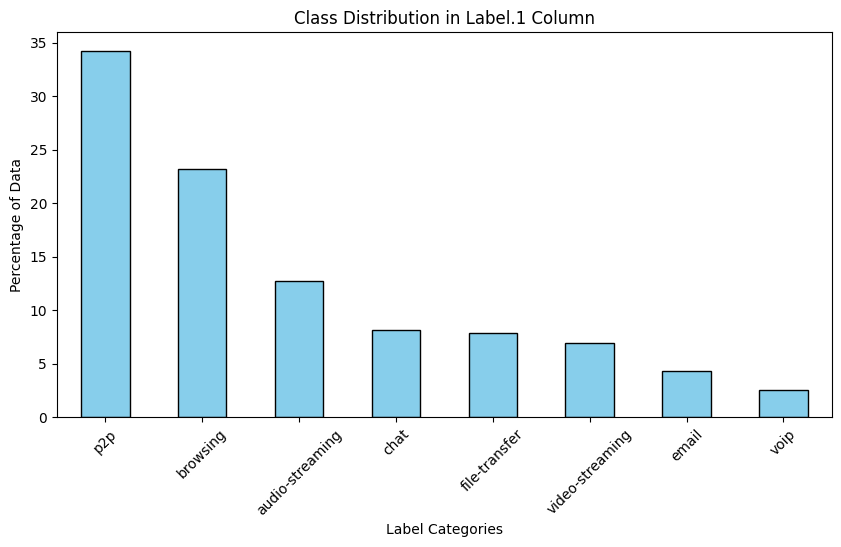

In [32]:
# Check class distribution
label_counts = df4['Label.1'].value_counts(normalize=True) * 100  # Convert to percentage

# Print results
print(label_counts)

# Optional: Visualize the distribution using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Label Categories')
plt.ylabel('Percentage of Data')
plt.title('Class Distribution in Label.1 Column')
plt.xticks(rotation=45)
plt.show()


In [33]:
from imblearn.under_sampling import RandomUnderSampler

# Define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling
X_resampled, y_resampled = undersample.fit_resample(df4.drop(columns=['Label.1']), df4['Label.1'])

# Create a new balanced DataFrame
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Check new class distribution
print(df_balanced['Label.1'].value_counts(normalize=True) * 100)


C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Label.1
audio-streaming    12.5
browsing           12.5
chat               12.5
email              12.5
file-transfer      12.5
p2p                12.5
video-streaming    12.5
voip               12.5
Name: proportion, dtype: float64


In [34]:
df_balanced['Label.1'].value_counts()

Label.1
audio-streaming    3566
browsing           3566
chat               3566
email              3566
file-transfer      3566
p2p                3566
video-streaming    3566
voip               3566
Name: count, dtype: int64

In [35]:
df_balanced['Label'].value_counts()

Label
Non-Tor    11197
NonVPN     10113
VPN         6686
Tor          532
Name: count, dtype: int64

In [36]:
from imblearn.under_sampling import RandomUnderSampler

# Define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling
X_resampled, y_resampled = undersample.fit_resample(df4.drop(columns=['Label']), df4['Label'])

# Create a new balanced DataFrame
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Check new class distribution
print(df_balanced['Label'].value_counts(normalize=True) * 100)


C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Label
Non-Tor    25.0
NonVPN     25.0
Tor        25.0
VPN        25.0
Name: proportion, dtype: float64


In [37]:
df4.to_csv('final_data.csv', index=False)

In [38]:
df4.shape

(141530, 19)